# Performing analysis with GeoDataframes
With spatial data stored as a geodataframe, we can run a number of analyses, both tabular, using Pandas operations, and spatial, using Geopandas operations. This notebook wades gently into the world of GeoPandas and also serves as a review of several Pandas operations. 

Specifically we examine the following:
* Reading & writing shapefiles into a GeoPandas dataFrame
* Reprojecting data using GeoPandas
* Exploring the GeoPandas dataFrame
 * Exposing the number of features 
 * Revealing the data types of each column 
 * Exploring the `geometry` data type
* Quick view of plotting in GeoPandas
* Quick view of geoprocessing in GeoPandas

### 1. Install the package and enable inline plots

In [1]:
#import the package
import geopandas as gpd

#enable plots to appear in the notebook
%matplotlib inline

---
<h2><font color='red'>► FIX REQUIRED ◄</font></h2>

*You need to run this code block to fix an issue with the `pyproj` module used by GeoPandas.*

For more on the issue see: 
https://github.com/geopandas/geopandas/issues/830

In [2]:
#Fix issue with pyproj 
import sys, os
pythonPath = sys.executable
pythonFolder = os.path.dirname(pythonPath)
shareFolder = os.path.join(pythonFolder,'Library','share')
os.environ["PROJ_LIB"] = shareFolder

---
### 2. Read a shapefile into a _GeoDataframe_
GeoPandas can read shapefiles directly. Behind the scenes, this operation is using the `GDAL` package which contains the binaries capable of understanding geospatial data, the `fiona` package, which allows Python to interact nicely with `GDAL` libraries, and the `shapely` package which has functions for operating with feature classes in a Pythonic way. GeoPandas coordinate reference systems can use the "European Petroleum Survey Group" (EPSG) codes as shorthand for various standard systems. 

Complete documentation on the GeoDataframe is here: http://geopandas.org/data_structures.html#geodataframe

In [3]:
#read in the HUC12.shp feature class
gdf = gpd.read_file('./Data/12Digit_HUC_Subwatersheds.shp')

### 3. Explore properties of the GeoDataframe
Here we explore various properties of our GeoDataframe. Note that all the operations that apply to a Pandas dataframe also apply to geodataframes... 

In [4]:
#How many features and attributes in the dataset?
gdf.shape

(1767, 13)

In [5]:
#show information on each column in the geodataframe
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 13 columns):
FID           1767 non-null int64
HUC_8         1767 non-null object
HUC_10        1767 non-null object
HUC_12        1767 non-null object
ACRES         1767 non-null int64
HU_10_NAME    1767 non-null object
HU_12_NAME    1767 non-null object
META_ID       1767 non-null object
STATES        1767 non-null object
Basin         1767 non-null object
Dig_8         1767 non-null int64
DWQ_Basin     1767 non-null object
geometry      1767 non-null object
dtypes: int64(3), object(10)
memory usage: 179.6+ KB


In [6]:
#Quick summary stats of the dataset
gdf.describe()

,FID,ACRES,Dig_8
count,1767.00000,1767.000000,1.767000e+03
mean,884.00000,20710.693831,3.410937e+06
std,510.23328,10779.120670,9.817839e+05
min,1.00000,2532.000000,3.010102e+06
25%,442.50000,14368.500000,3.020105e+06
50%,884.00000,19664.000000,3.030005e+06
75%,1325.50000,25508.000000,3.040206e+06
max,1767.00000,253688.000000,6.020003e+06


In [7]:
#examine the attributes for the first feature
gdf.iloc[0]

FID                                                           1
HUC_8                                                  03040208
HUC_10                                               0304020802
HUC_12                                             030402080205
ACRES                                                      7321
HU_10_NAME                                      Shallotte River
HU_12_NAME                                Holden Beach-Long Bay
META_ID                                                    NC01
STATES                                                       NC
Basin                                                       LBR
Dig_8                                                   3040208
DWQ_Basin                                                Lumber
geometry      (POLYGON ((-78.3872405238257 33.8981038497261,...
Name: 0, dtype: object

In [8]:
#What coordinate reference system is used? Check http://epsg.io for what this code is
gdf.crs

{'init': 'epsg:4326'}

→ If the crs returns an 'epsg' code you can generate a URL to look it up...

In [9]:
#Get the epsg code from the crs
epsg = gdf.crs['init'].split(':')[1]
#Generate and print the URL, which you can click on...
print("http://epsg.io/{}".format(epsg))

http://epsg.io/4326


In [10]:
#show the geometry type(s) in this geodataframe
gdf.type.unique()

array(['MultiPolygon', 'Polygon'], dtype=object)

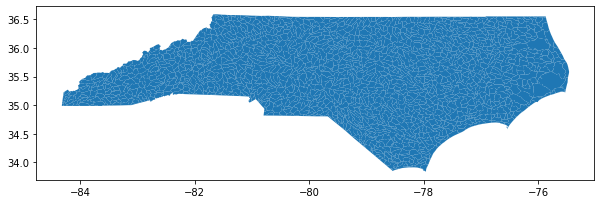

In [11]:
#Simple plot
gdf.plot(figsize=(10,5));

### 4. Projections in GeoPandas: Reprojecting data
We see our native data is unprojected, using the WGS84 geographic coordinate system. If we want to compute areas or lengths in meaningful units, we'll have to reproject the data to projected coordinate system. Here we'll reproject our NAD83 data to UTM Zone 17 N, which has an EPSG code of `26917`. 
* http://geopandas.org/projections.html

In [12]:
#Reproject to UTM: 
#  If this results in "b'no arguments in initialization list'" error
#  see the "Fix" above!
gdfUTM  = gdf.to_crs({'init':'epsg:26917'})

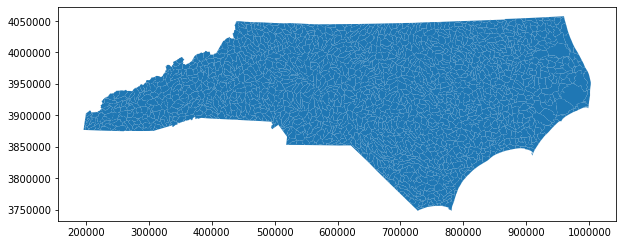

In [13]:
#Simple plot - does it look different than above? 
gdfUTM.plot(figsize=(10,5));

### 5. Exploring the `geometry` objects in a GeoPandas dataframe
The key to Geopandas ability to work with geospatial data is by adding a new data type to the standard Pandas dataFrame: this is stored in the `geometry` field. Let's explore this field. 

Complete documentation on the geometry object is here: http://geopandas.org/geometric_manipulations.html

In [14]:
#show the first 5 values in the geometry field: this is actually a GeoSeries...
gdfUTM['geometry'][0:5]

0    (POLYGON ((741602.2849552348 3753931.596744546...
1    (POLYGON ((776236.6038881675 3753807.428691708...
2    POLYGON ((767552.9026482713 3755767.133239705,...
3    POLYGON ((736123.6400715632 3762835.350268614,...
4    POLYGON ((763591.4066242818 3760324.330113501,...
Name: geometry, dtype: object

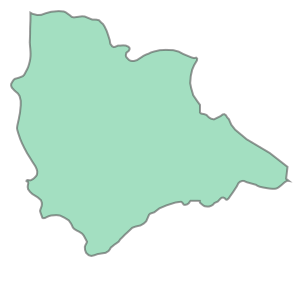

In [15]:
#show just a single geometry - it appears as a shape
gdfUTM['geometry'][10]

Now let's save that one geometry object, a polygon in this case to variable and examine what GeoPandas allows us to do with it. 

In [16]:
#Extract one feature geometry to a variable; what is its datatype?
thePoly = gdfUTM['geometry'][10]
type(thePoly)

shapely.geometry.polygon.Polygon

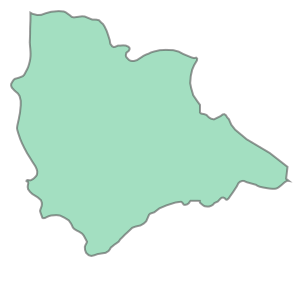

In [17]:
#Show thePoly
thePoly

In [18]:
#Show the area and perimeter length of ths polygon
theArea = thePoly.area
thePerim = thePoly.length
print ("Area (m2):",int(theArea))
print ("Permeter (m):",int(thePerim))

Area (m2): 33492168
Permeter (m): 28440


In [19]:
#Convert the polygon's boundary to a linestring (i.e. a line feature)
theBoundary = thePoly.boundary
type(theBoundary)

shapely.geometry.linestring.LineString

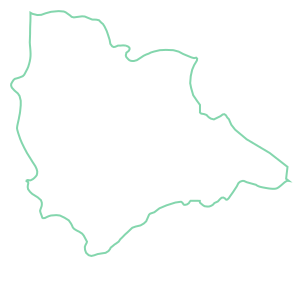

In [20]:
#Show the linestring - we see it as a line feature, as expected
theBoundary

In [21]:
#Create the centroid of the feature
theCentroid = thePoly.centroid
type(theCentroid)

shapely.geometry.point.Point

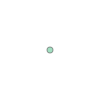

In [22]:
#Display the centroid - it doesn't appear (a point is infinitely small)
theCentroid

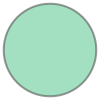

In [23]:
#But we can show the point buffered 10 m
theCentroid.buffer(10)

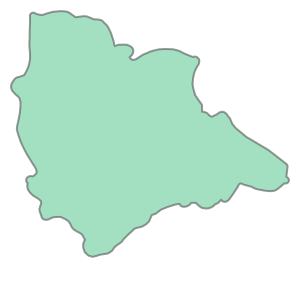

In [24]:
#We can buffer polygons too
thePoly.buffer(100)

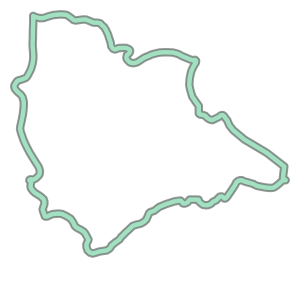

In [25]:
#Aren't you curious?
theBoundary.buffer(100)

→ [Other feature transformations](http://geopandas.org/geometric_manipulations.html?highlight=buffer#constructive-methods) to try: `convex_hull`, `envelope`, `simplify(tolerance=100)`...

### 6. Spatial Analysis among geometries
Let's move on to more sophisticated spatial analysis that we can do with GeoPandas. First we'll look at working with GeoSeries objects, i.e. arrays of geometries. Just as we can perform mathematical operations on sets of numbers stored in a Panda series or Numpy array, we can run spatial tools 
#### Subset features using Pandas `query`
First, we'll subset our data to a more manageable size dataset. For this we use Pandas queries. 

In [26]:
#Remind ourselves what columns are in this dataset
gdfUTM.columns

Index(['FID', 'HUC_8', 'HUC_10', 'HUC_12', 'ACRES', 'HU_10_NAME', 'HU_12_NAME',
       'META_ID', 'STATES', 'Basin', 'Dig_8', 'DWQ_Basin', 'geometry'],
      dtype='object')

In [27]:
#List unique values in the Basin field
gdfUTM['DWQ_Basin'].unique()

array(['Lumber', 'Cape Fear', 'White Oak', 'Yadkin Pee Dee', 'Neuse',
       'Tar-Pamlico', 'Catawba', 'Pasquotank', 'Roanoke', 'French Broad',
       'Little Tennessee', 'Broad', 'Savannah', 'Chowan', 'New',
       'Watauga', 'Hiwassee'], dtype=object)

In [28]:
#Create a dataframe of HUCs in the Neuse basin
gdfNeuse = gdfUTM.query('DWQ_Basin == "Neuse"')
gdfNeuse.shape

(190, 13)

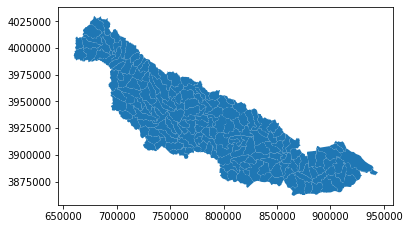

In [29]:
#Quick plot
gdfNeuse.plot();

#### Computing distances between features
How far is each HUC in the Neuse from Durham? To do this we first have to create a point representing Durham. We do this using the Shapely package: https://shapely.readthedocs.io/en/stable/manual.html#points. However, to match the projection of our Neuse dataframe, we need to project our point to UTM Zone 17N. We do this with the `pyproj` package.

In [30]:
#Create a point for Durham (Lat=36.0043793;Long=-78.9429345)
from shapely.geometry import Point
ptDurham_DD = Point(-78.9429345,36.0043793)
type(ptDurham_DD)

shapely.geometry.point.Point

In [109]:
#Project Durham from NAD83 decimal degrees to UTM Zone 17n (WKID=26917)
import pyproj
prjNAD83 = pyproj.Proj(init='epsg:4326')
prjUTM17N = pyproj.Proj(init='epsg:26917')
ptDurham_UTM = Point(pyproj.transform(prjNAD83,       #Source projection
                                      prjUTM17N,      #Destination projection
                                      ptDurham_DD.x,  #X coordinate
                                      ptDurham_DD.y)) #Y coordinate
#Show the coordinates
ptDurham_UTM.x,ptDurham_UTM.y

(685400.5834348248, 3986391.1313402676)

In [110]:
#Compute the distance of each feature to this center point & show the mean
theDistances_km = gdfUTM.distance(ptDurham_UTM)/1000
#This returns a series -- a list of distances to each catchment feature
type(theDistances_km)

pandas.core.series.Series

In [111]:
#Summary stats of all the distances
theDistances_km.describe()

count    1767.000000
mean      180.952434
std        99.543188
min         0.000000
25%       110.585673
50%       169.361613
75%       232.229407
max       496.505410
dtype: float64

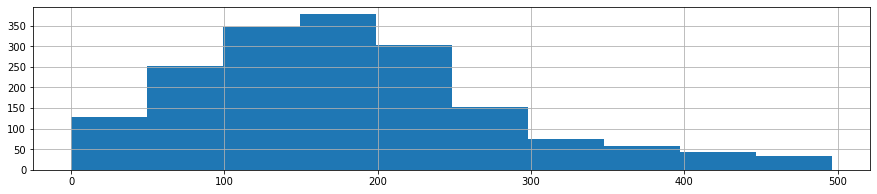

In [112]:
#Plot a histogram of values
theDistances_km.hist(figsize=(15,3));

#### Buffering all features
What if we wanted to find the "core area" of all our Neuse HUCS, i.e. all area within 1500m of its border. We can do that easily by buffering our features with a negative value:

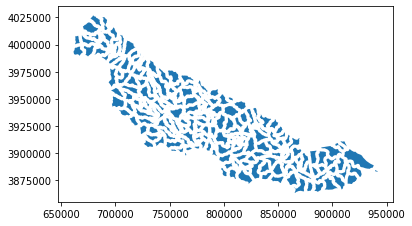

In [113]:
#Buffer the HUCs -1500m
gdfNeuseCore = gdfNeuse.buffer(-1500)
gdfNeuseCore.plot()

In [114]:
#Report summary stats of the areas of the returned features
gdfNeuseCore.area.describe()

count    1.900000e+02
mean     2.594903e+07
std      2.272818e+07
min      1.008105e+05
25%      1.063077e+07
50%      1.933047e+07
75%      3.616430e+07
max      2.075359e+08
dtype: float64

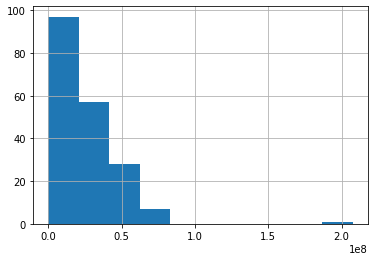

In [115]:
#Reveal a histogram of the areas
gdfNeuseCore.area.hist();

#### Clipping features
Now let's see what the area of each HUC is within 5000m of Durham...

In [116]:
#Buffer Durham 1500m 
durham_5000m = ptDurham_UTM.buffer(5000)
type(durham_5000m)

shapely.geometry.polygon.Polygon

In [93]:
#Add that one geometry feature to a new geoseries then to a new geodataframe
gs_Durham = gpd.GeoSeries(durham_5000m)
type(gs_Durham)

geopandas.geoseries.GeoSeries

In [117]:
gdf_Durham = gpd.GeoDataFrame(gs_Durham,geometry=gs_Durham)
type(gdf_Durham)

geopandas.geodataframe.GeoDataFrame

In [118]:
gdf_Durham.crs = gdfNeuse.crs

In [119]:
gs_Neuse = gdfNeuse.geometry
type(gs_Neuse)

geopandas.geoseries.GeoSeries

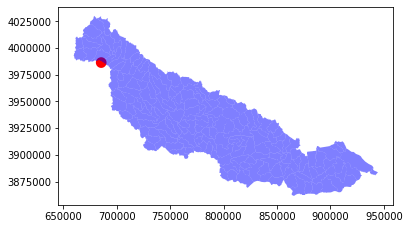

In [120]:
ax = gs_Durham.plot(color='red')
gs_Neuse.plot(ax=ax,color='blue',alpha=0.5);

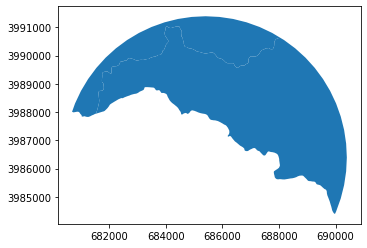

In [122]:
#Clip the HUC layer
gdfNeuseClip = gpd.overlay(gdf_Durham,gdfNeuse,how='intersection')
#Show the Clip
gdfNeuseClip.plot()

### A more complex analyis
Here we will buffer the centroid of a feature and then intersect that with the feature. 

* We begin by selecting a feature. We'll pick on the Elk Creek HUC...

In [ ]:
#Select a feature by an attribute
hucMask = gdfUTM['HU_12_NAME'] == 'Elk Creek'
gdfHUC = gdfUTM[hucMask]
type(gdfHUC)

In [ ]:
#Show the results
gdfHUC

►This approach is slightly different than in the above example (`thePoly = gdfUTM['geometry'][0]`) which returned a _Shapely geometry_ object from the geodataframe; here our query returns a _GeoSeries_ object. However, other than plotting, the behavior is mostly the same.

In [ ]:
#Get the shape of the feature
feature_geometry = gdfHUC['geometry'] #->returns a GeoSeries, not a shapely geometry
type(feature_geometry)

In [ ]:
#Copy the dfHUC dataframe and then we'll modify geometries
gdfHUC_copy = gdfHUC.copy(deep=True)

In [ ]:
#Update geometry to the centroid of each feature buffered 5000m
gdfHUC_copy['geometry'] = gdfHUC_copy['geometry'].centroid.buffer(5000)

In [ ]:
#Buffer the centroid
theBuffer = theCentroid.buffer(100)
#Intersect the buffer and the original shape
theClip = gpd.overlay(gdfHUC_copy,gdfHUC,how='intersection')
#Show the Clip
theClip.plot()

## 7. Geospatial capabilities of the GeoPandas dataFrame object

In [ ]:
#Dissolving
dfHUC8 = gdf.dissolve(by='HUC_8',aggfunc='sum')
dfHUC8.dtypes

In [ ]:
dfHUC8.plot(column='ACRES',
            scheme='quantiles',        
            figsize=(14,18));

## Recap
In this super quick introduction to GeoPandas, we saw that the GeoDataFrame is easy to construct from a shapefile, and once constructed gives us access to the analytic capability of Pandas dataframes (e.g. selecting, summarizing, etc.) as well as plotting and spatial analytic capability. 

I'm hopeful that at the end of this short introduction you're eager to read up on the documentation and learn more what GeoPandas can do. 